# **PART B**: Multi-class classification using Deep Learning

### **WARNING**: The code block below is an optional step. Run it if the database is stored on your drive, otherwise skip this block. Remember to change the zip_path directory accordingly should you run it.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

# Change path accordingly if data is saved in your Drive
zip_path = '/content/gdrive/MyDrive/CV_3/imagedb_btsd.zip'

Mounted at /content/gdrive


### **1)** Unzip the data folder.
COMMENT: Uncomment the zip_path directory if database is stored locally.

In [2]:
import os
import zipfile

# # Uncomment zip_path, if data is saved locally
# zip_path = 'imagedb_btsd.zip'

zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('/content')
zip_ref.close()

### **2)** Calculate average (max) dimension and average aspect ratio in train (and validation) data.

In [3]:
import numpy as np
import cv2

train_dir = 'imagedb'

folder_max_dim = []
folder_aspect_ratio = []
train_folders = os.listdir(train_dir)

for folder in train_folders:
    train_folder = os.path.join(train_dir, folder)
    files = os.listdir(train_folder)
    file_max_dim = []
    file_aspect_ratio = []

    for file in files:
        path = os.path.join(train_folder, file)
        img_shape = (cv2.imread(path)).shape
        file_max_dim.append(max(img_shape))
        file_aspect_ratio.append(img_shape[1]/img_shape[0])

    total_folder_files = len(file_max_dim)
    folder_max_dim.append(sum(file_max_dim)/total_folder_files)
    folder_aspect_ratio.append(sum(file_aspect_ratio)/total_folder_files)

total_classes = len(folder_max_dim)
train_dim = round((sum(folder_max_dim)/total_classes))
train_aspect_ratio = sum(folder_aspect_ratio)/total_classes

print("The average (max) dimension in train (and validation) data is: %d" % train_dim)
print("The average aspect ratio in train (and validation) data is: %.2f" % train_aspect_ratio)

The average (max) dimension in train (and validation) data is: 132
The average aspect ratio in train (and validation) data is: 0.94


### **3)** Print an image from the training data to ensure that the unziping was successful.

Plot an image to ensure successful operation:



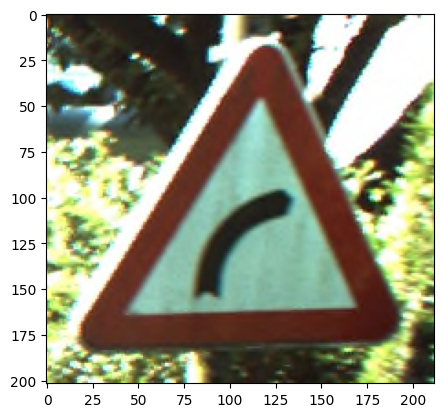

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "imagedb/00004"
files = os.listdir(img_path)
img_path = os.path.join(img_path, files[0])
img = mpimg.imread(img_path)
plt.imshow(img,cmap='gray')

print("Plot an image to ensure successful operation:")
print()
plt.show()

### **4)** Preprocess and load image data for training and validation.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define size of images entering the CNN
input_img = 56

# Split the training data so 10% is reserved for validation
train_datagen = ImageDataGenerator(validation_split=0.10)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=50,
                                                    class_mode='categorical',
                                                    color_mode='grayscale',
                                                    target_size=(input_img,input_img),
                                                    # shuffle=True,
                                                    # seed=1,
                                                    subset='training')

validation_generator =  train_datagen.flow_from_directory(train_dir,
                                                        batch_size=50,
                                                        class_mode='categorical',
                                                        color_mode='grayscale',
                                                        target_size=(input_img,input_img),
                                                        # seed=1,
                                                        subset='validation')

Found 2767 images belonging to 34 classes.
Found 289 images belonging to 34 classes.


### **5)** Define the architecture of the **IliasNet** Convolutional Neural Network (CNN).

In [26]:
import tensorflow as tf

# Architecture of IliasNet CCN
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(20, (5, 5), strides=(1, 1), activation='relu', input_shape=(input_img, input_img, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(40, (5, 5), strides=(1, 1), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1100, activation='relu'),
  tf.keras.layers.Dense(600, activation='relu'),
  tf.keras.layers.Dense(total_classes, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 20)          │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 22, 22, 40)          │          20,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 11, 11, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4840)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1100)                │       5,325,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 600)                 │         660,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 34)                  │          20,434 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,026,694 (22.99 MB)

 Trainable params: 6,026,694 (22.99 MB)

 Non-trainable params: 0 (0.00 B)

### **6)** Train and validate the model.

In [27]:
callbacks = []

save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.keras', save_best_only=True, verbose=1)
callbacks.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True, verbose=1)
callbacks.append(early_stop_callback)

history = model.fit(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch=train_generator.samples//train_generator.batch_size,
                              epochs = 100,
                              # validation_steps = 50,
                              verbose = 1,
                              callbacks = callbacks)

model.save('my_model.keras')
print()
print()
print("### Model saved successfully as my_model.keras ###")

Epoch 1/100
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.3235 - loss: 33.9162
Epoch 1: val_loss improved from inf to 0.29307, saving model to best_weights.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.3575 - loss: 31.1150 - val_accuracy: 0.9308 - val_loss: 0.2931
Epoch 2/100
 1/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9400 - loss: 0.3763
Epoch 2: val_loss did not improve from 0.29307
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.3763 - val_accuracy: 0.9135 - val_loss: 0.3102
Epoch 3/100
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9541 - loss: 0.1882
Epoch 3: val_loss improved from 0.29307 to 0.28177, saving model to best_weights.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9543 - loss: 0.1865 - val_accuracy: 0.9308 - val_loss: 0.2818
Epoch 4/100
 1/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9200 - loss: 0.3208
Epoch 4: val_loss did not improve from 0.28177
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

### **7)** Plot accuracy and loss of the model during training and validation.

### Plot of Accuracy over epochs ###



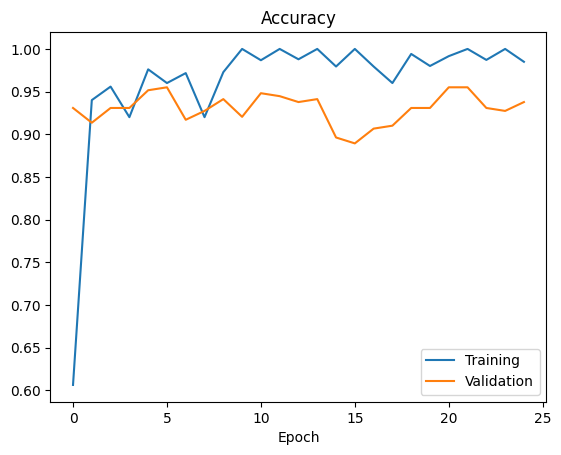


### Plot of Loss over epochs ###



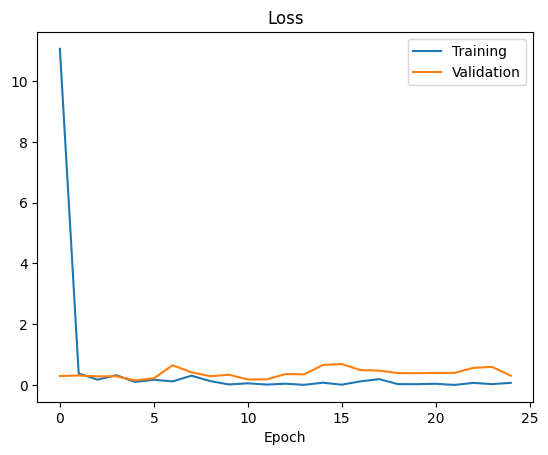

In [28]:
print("### Plot of Accuracy over epochs ###")
print()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()
print()

print("### Plot of Loss over epochs ###")
print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()

### **8)** Test the produced model on new (different) data.

In [29]:
test_datagen  = ImageDataGenerator()
test_dir = 'imagedb_test'
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=25,
                                                         class_mode  = 'categorical',
                                                         color_mode='grayscale',
                                                         target_size=(input_img,input_img))


loss, acc = model.evaluate(test_generator)
print()
print("### TESTING RESULTS ###")
print()
print("The model has achieved:")
print("- Accuracy: %.3f => %.1f%%" % (acc, 100 * acc))
print("- Loss: %.3f => %.1f%%" % (loss, 100 * loss))

Found 2149 images belonging to 34 classes.
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.9302 - loss: 0.3308

### TESTING RESULTS ###

The model has achieved:
- Accuracy: 0.927 => 92.7%
- Loss: 0.363 => 36.3%


### **9)** RESULT VISUALIZATION: Test the model on test images (view softmax output).

### Result Visualization ###

The image below has been input to the produced model:



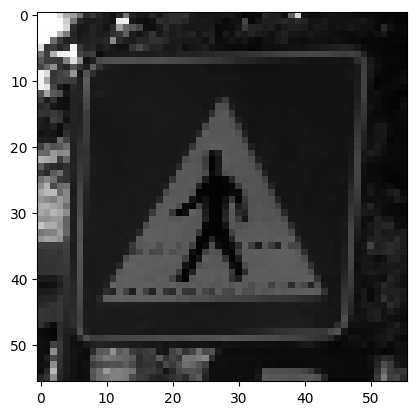

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.003%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.002%
9) 00018 => Softmax Output: 0.061%
10) 00019 => Softmax Output: 0.001%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.001%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.001%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.002%
22) 00039 => Softmax Output: 0.001%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.002%
27) 00047 => Softmax Output: 0.001%


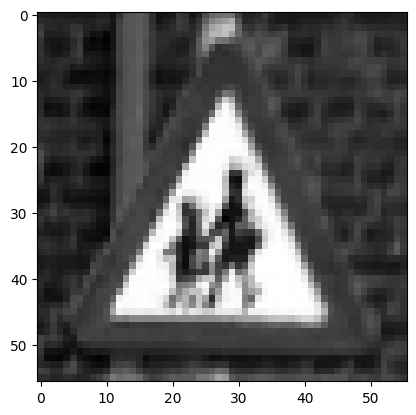

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.001%
3) 00007 => Softmax Output: 99.99%
4) 00008 => Softmax Output: 0.009%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => So

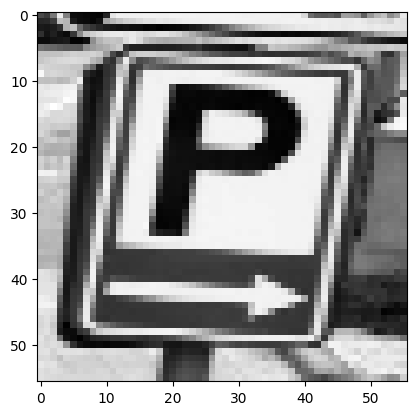

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 60.513%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softm

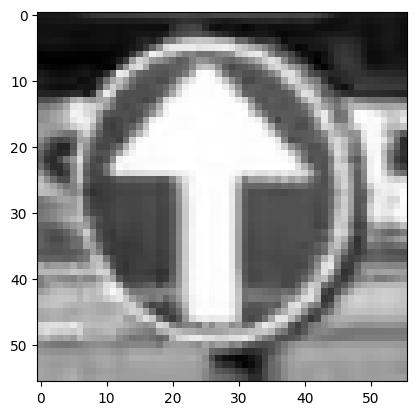

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 100.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softma

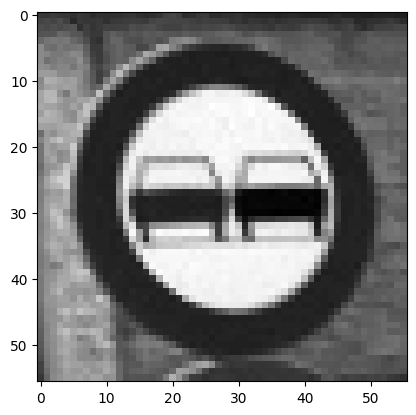

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 100.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softma

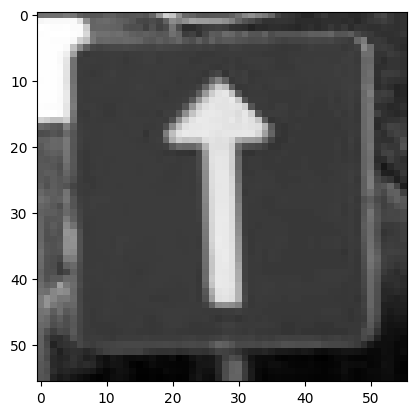

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softmax 

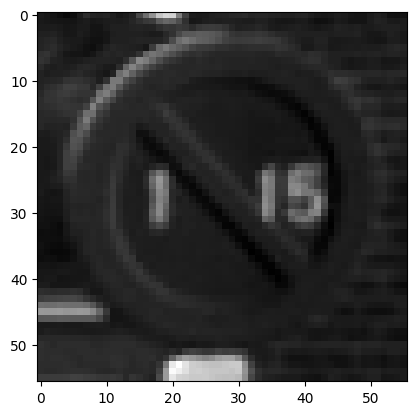

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 99.567%
25) 00043 => Softmax Output: 0.432%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Sof

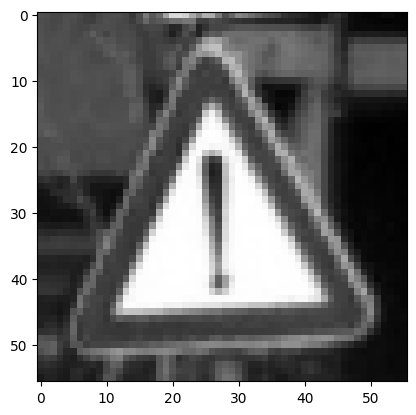

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.001%
2) 00005 => Softmax Output: 0.155%
3) 00007 => Softmax Output: 0.001%
4) 00008 => Softmax Output: 42.557%
5) 00010 => Softmax Output: 0.001%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 57.013%
8) 00017 => Softmax Output: 0.125%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.002%
14) 00029 => Softmax Output: 0.001%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.008%
27) 00047 => Softmax Output: 0.00

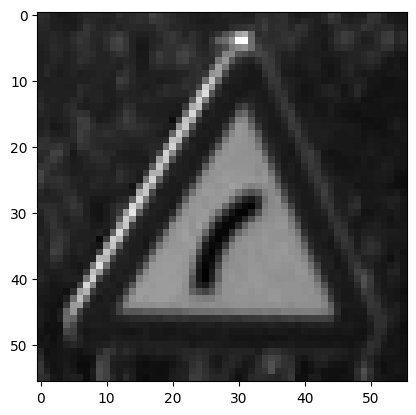

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 8.125%
2) 00005 => Softmax Output: 0.325%
3) 00007 => Softmax Output: 14.909%
4) 00008 => Softmax Output: 1.045%
5) 00010 => Softmax Output: 0.683%
6) 00012 => Softmax Output: 0.045%
7) 00013 => Softmax Output: 1.441%
8) 00017 => Softmax Output: 55.501%
9) 00018 => Softmax Output: 16.772%
10) 00019 => Softmax Output: 0.004%
11) 00021 => Softmax Output: 0.049%
12) 00027 => Softmax Output: 0.026%
13) 00028 => Softmax Output: 0.003%
14) 00029 => Softmax Output: 0.01%
15) 00030 => Softmax Output: 0.004%
16) 00031 => Softmax Output: 0.027%
17) 00032 => Softmax Output: 0.057%
18) 00034 => Softmax Output: 0.087%
19) 00035 => Softmax Output: 0.024%
20) 00037 => Softmax Output: 0.038%
21) 00038 => Softmax Output: 0.008%
22) 00039 => Softmax Output: 0.296%
23) 00041 => Softmax Output: 0.006%
24) 00042 => Softmax Output: 0.004%
25) 00043 => Softmax Output: 0.011%
26) 00045 => Softmax Output: 0.039%
2

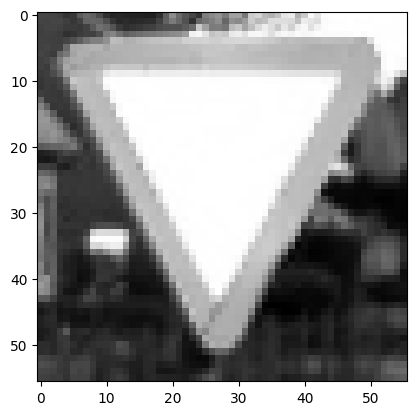

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 100.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softma

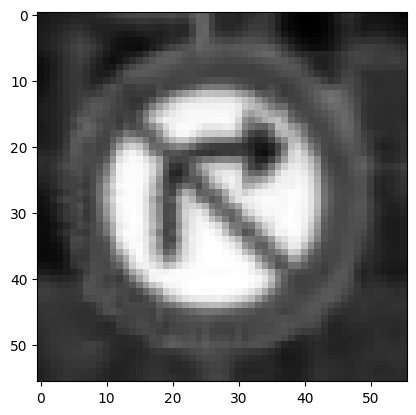

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.002%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 14.497%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 85.5%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => So

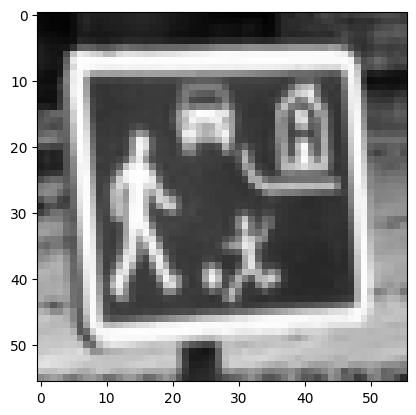

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softmax 

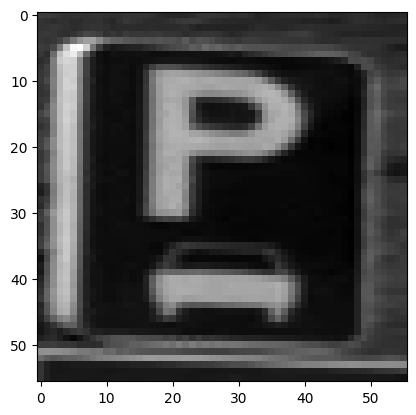

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 100.0%
28) 00051 => Softma

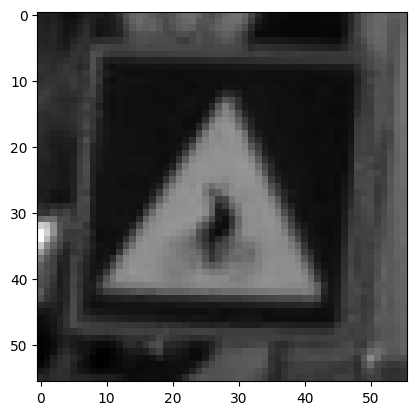

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.037%
2) 00005 => Softmax Output: 0.095%
3) 00007 => Softmax Output: 0.002%
4) 00008 => Softmax Output: 0.011%
5) 00010 => Softmax Output: 0.014%
6) 00012 => Softmax Output: 0.004%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.003%
9) 00018 => Softmax Output: 0.139%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.001%
12) 00027 => Softmax Output: 0.002%
13) 00028 => Softmax Output: 0.005%
14) 00029 => Softmax Output: 0.002%
15) 00030 => Softmax Output: 0.002%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.011%
18) 00034 => Softmax Output: 0.001%
19) 00035 => Softmax Output: 0.004%
20) 00037 => Softmax Output: 0.002%
21) 00038 => Softmax Output: 0.002%
22) 00039 => Softmax Output: 0.009%
23) 00041 => Softmax Output: 0.001%
24) 00042 => Softmax Output: 0.001%
25) 00043 => Softmax Output: 0.005%
26) 00045 => Softmax Output: 0.007%
27) 00047

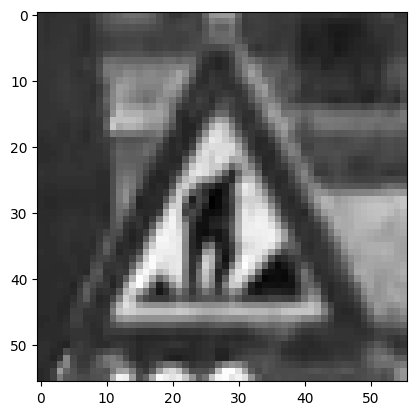

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.002%
2) 00005 => Softmax Output: 0.29%
3) 00007 => Softmax Output: 0.001%
4) 00008 => Softmax Output: 0.001%
5) 00010 => Softmax Output: 99.649%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.034%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.001%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.001%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.001%
23) 00041 => Softmax Output: 0.001%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.01%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%


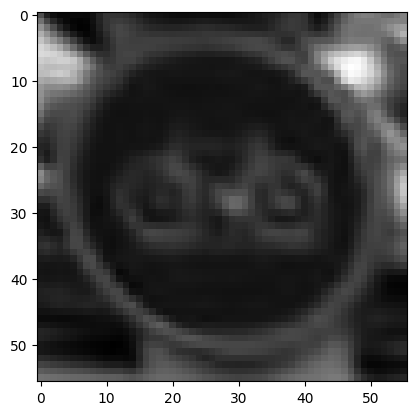

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.002%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.002%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.005%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.196%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.002%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.001%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.003%
19) 00035 => Softmax Output: 0.004%
20) 00037 => Softmax Output: 0.013%
21) 00038 => Softmax Output: 99.291%
22) 00039 => Softmax Output: 0.085%
23) 00041 => Softmax Output: 0.114%
24) 00042 => Softmax Output: 0.136%
25) 00043 => Softmax Output: 0.014%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Outpu

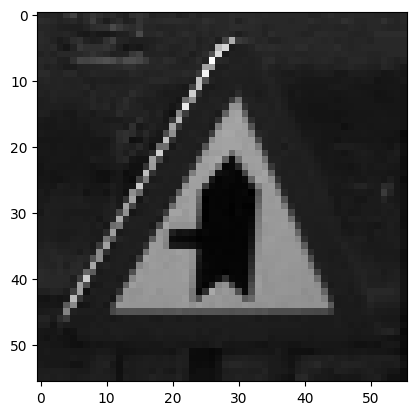

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 99.999%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softm

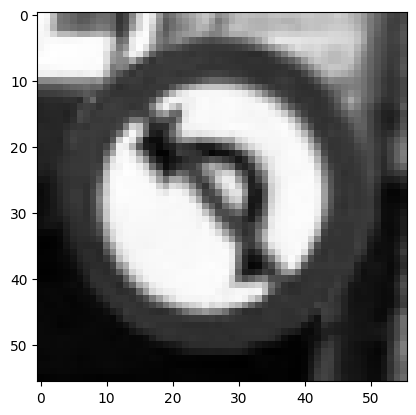

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 99.883%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.117%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Sof

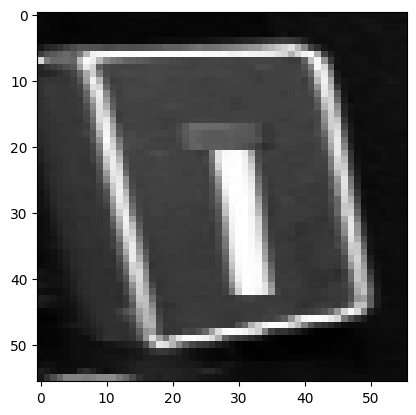

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softmax 

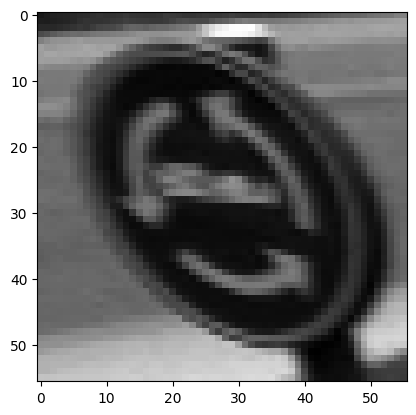

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.021%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.001%
6) 00012 => Softmax Output: 0.001%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.01%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.003%
12) 00027 => Softmax Output: 0.001%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.001%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.775%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.002%
20) 00037 => Softmax Output: 91.614%
21) 00038 => Softmax Output: 0.193%
22) 00039 => Softmax Output: 0.029%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.001%
25) 00043 => Softmax Output: 0.004%
26) 00045 => Softmax Output: 5.236%
27) 00047 => Softmax Outp

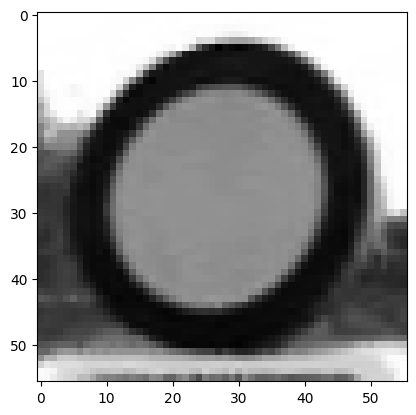

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 100.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softma

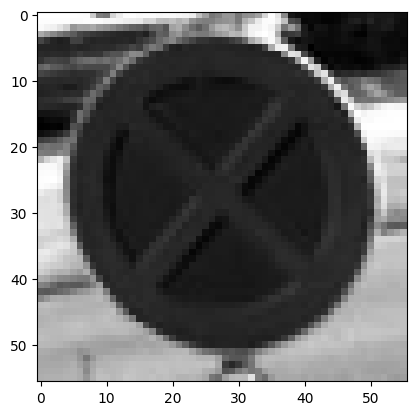

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.017%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 99.96%
24) 00042 => Softmax Output: 0.021%
25) 00043 => Softmax Output: 0.001%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => 

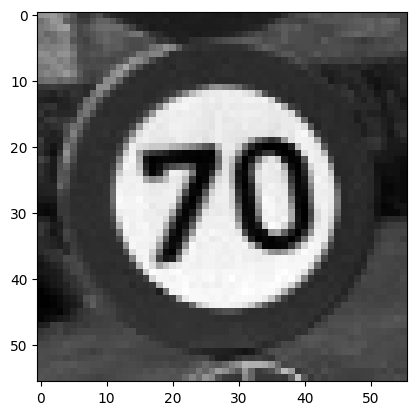

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 100.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softma

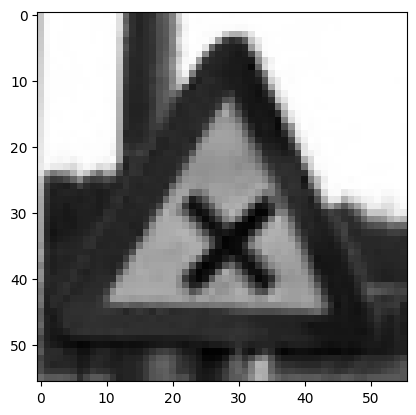

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 100.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softma

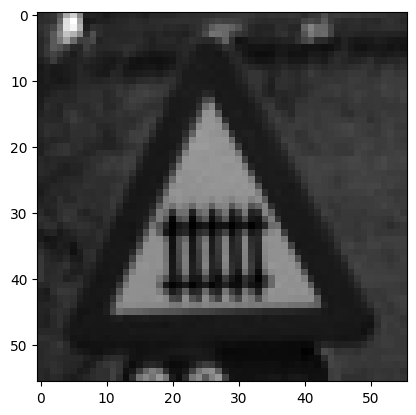

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 2.804%
2) 00005 => Softmax Output: 29.559%
3) 00007 => Softmax Output: 53.077%
4) 00008 => Softmax Output: 5.011%
5) 00010 => Softmax Output: 0.922%
6) 00012 => Softmax Output: 2.677%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 1.25%
9) 00018 => Softmax Output: 2.844%
10) 00019 => Softmax Output: 0.006%
11) 00021 => Softmax Output: 0.033%
12) 00027 => Softmax Output: 0.001%
13) 00028 => Softmax Output: 0.025%
14) 00029 => Softmax Output: 0.02%
15) 00030 => Softmax Output: 0.019%
16) 00031 => Softmax Output: 0.008%
17) 00032 => Softmax Output: 0.013%
18) 00034 => Softmax Output: 0.012%
19) 00035 => Softmax Output: 0.009%
20) 00037 => Softmax Output: 0.013%
21) 00038 => Softmax Output: 0.007%
22) 00039 => Softmax Output: 0.048%
23) 00041 => Softmax Output: 0.063%
24) 00042 => Softmax Output: 0.004%
25) 00043 => Softmax Output: 0.021%
26) 00045 => Softmax Output: 0.173%
27) 0

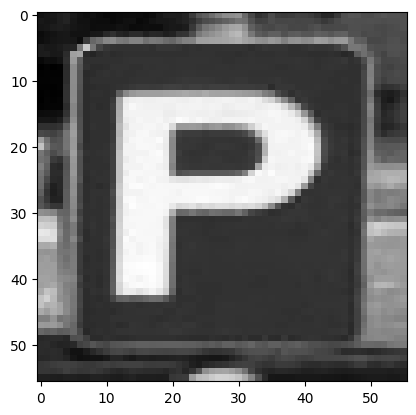

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 100.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softma

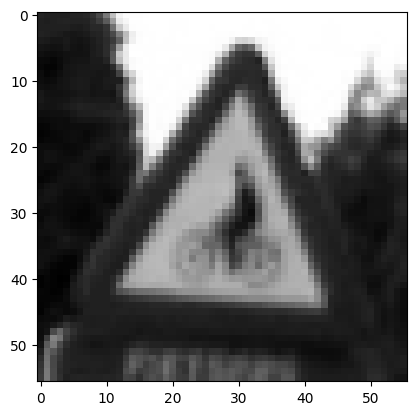

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.679%
2) 00005 => Softmax Output: 0.592%
3) 00007 => Softmax Output: 0.002%
4) 00008 => Softmax Output: 96.449%
5) 00010 => Softmax Output: 0.001%
6) 00012 => Softmax Output: 0.02%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.002%
9) 00018 => Softmax Output: 2.01%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.002%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.125%
28

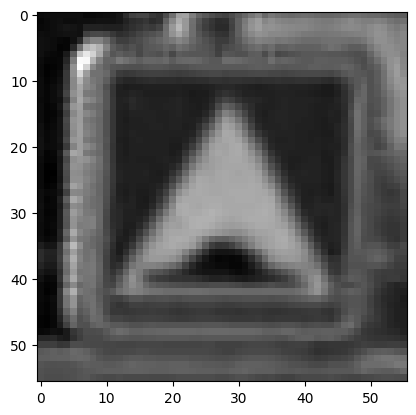

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.318%
2) 00005 => Softmax Output: 0.324%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.618%
5) 00010 => Softmax Output: 1.363%
6) 00012 => Softmax Output: 0.339%
7) 00013 => Softmax Output: 0.004%
8) 00017 => Softmax Output: 0.187%
9) 00018 => Softmax Output: 8.162%
10) 00019 => Softmax Output: 0.83%
11) 00021 => Softmax Output: 0.403%
12) 00027 => Softmax Output: 0.002%
13) 00028 => Softmax Output: 0.104%
14) 00029 => Softmax Output: 0.076%
15) 00030 => Softmax Output: 0.016%
16) 00031 => Softmax Output: 0.025%
17) 00032 => Softmax Output: 0.087%
18) 00034 => Softmax Output: 0.058%
19) 00035 => Softmax Output: 0.829%
20) 00037 => Softmax Output: 0.079%
21) 00038 => Softmax Output: 12.155%
22) 00039 => Softmax Output: 2.772%
23) 00041 => Softmax Output: 1.405%
24) 00042 => Softmax Output: 4.143%
25) 00043 => Softmax Output: 2.291%
26) 00045 => Softmax Output: 0.202%
27) 0

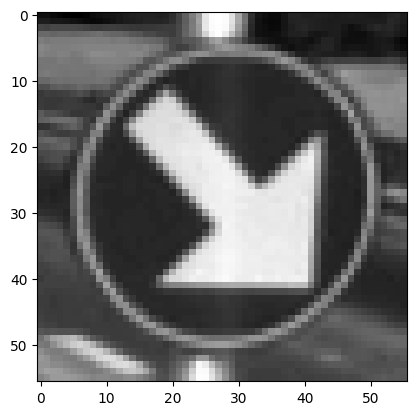

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.001%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.001%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.695%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.286%
12) 00027 => Softmax Output: 0.011%
13) 00028 => Softmax Output: 0.001%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.001%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 97.498%
20) 00037 => Softmax Output: 0.172%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.002%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.01%
25) 00043 => Softmax Output: 0.002%
26) 00045 => Softmax Output: 0.001%
27) 00047 => Softmax Output: 

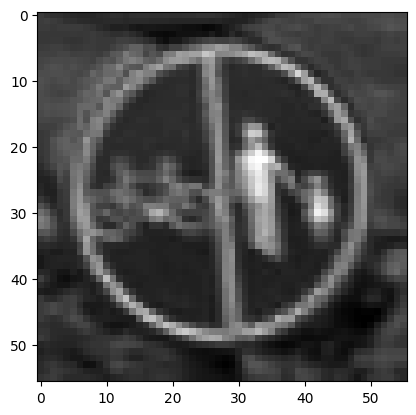

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.001%
22) 00039 => Softmax Output: 99.999%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Sof

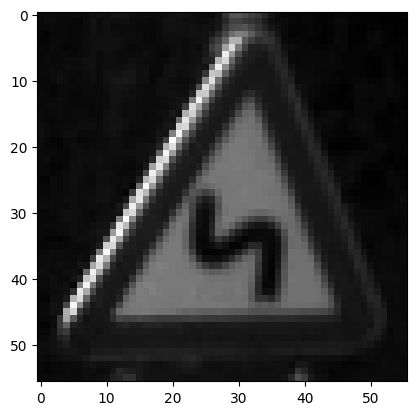

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.159%
2) 00005 => Softmax Output: 14.479%
3) 00007 => Softmax Output: 35.597%
4) 00008 => Softmax Output: 0.045%
5) 00010 => Softmax Output: 0.313%
6) 00012 => Softmax Output: 0.05%
7) 00013 => Softmax Output: 5.266%
8) 00017 => Softmax Output: 41.604%
9) 00018 => Softmax Output: 1.133%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.061%
12) 00027 => Softmax Output: 0.001%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.003%
17) 00032 => Softmax Output: 0.053%
18) 00034 => Softmax Output: 0.012%
19) 00035 => Softmax Output: 0.045%
20) 00037 => Softmax Output: 1.021%
21) 00038 => Softmax Output: 0.001%
22) 00039 => Softmax Output: 0.074%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.001%
26) 00045 => Softmax Output: 0.014%
27) 00047 => 

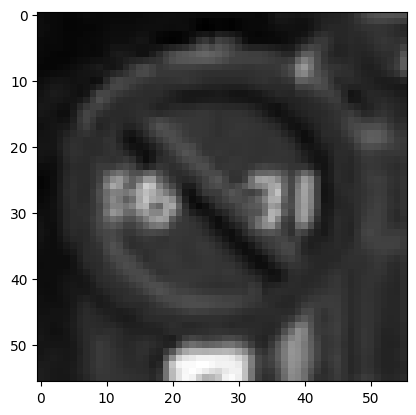

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.001%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.003%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.001%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.002%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.001%
22) 00039 => Softmax Output: 0.005%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 37.249%
25) 00043 => Softmax Output: 62.731%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.002%
2

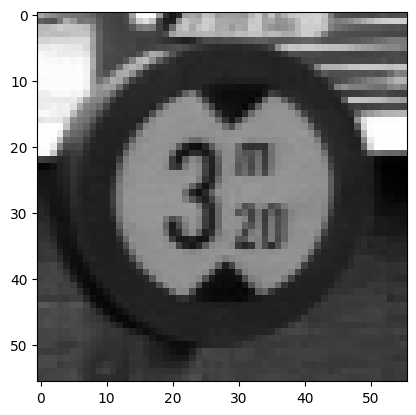

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.002%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 0.001%
12) 00027 => Softmax Output: 97.238%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.001%
17) 00032 => Softmax Output: 2.679%
18) 00034 => Softmax Output: 0.001%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.073%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.001%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 

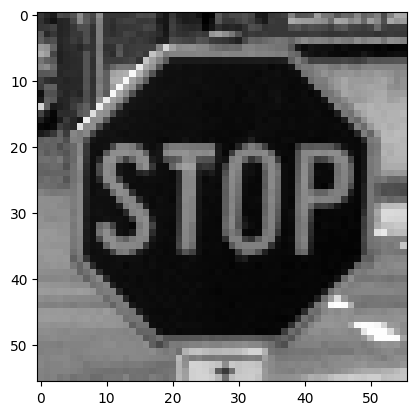

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

There are 34 possible classes:
1) 00004 => Softmax Output: 0.0%
2) 00005 => Softmax Output: 0.0%
3) 00007 => Softmax Output: 0.0%
4) 00008 => Softmax Output: 0.0%
5) 00010 => Softmax Output: 0.0%
6) 00012 => Softmax Output: 0.0%
7) 00013 => Softmax Output: 0.0%
8) 00017 => Softmax Output: 0.0%
9) 00018 => Softmax Output: 0.0%
10) 00019 => Softmax Output: 0.0%
11) 00021 => Softmax Output: 100.0%
12) 00027 => Softmax Output: 0.0%
13) 00028 => Softmax Output: 0.0%
14) 00029 => Softmax Output: 0.0%
15) 00030 => Softmax Output: 0.0%
16) 00031 => Softmax Output: 0.0%
17) 00032 => Softmax Output: 0.0%
18) 00034 => Softmax Output: 0.0%
19) 00035 => Softmax Output: 0.0%
20) 00037 => Softmax Output: 0.0%
21) 00038 => Softmax Output: 0.0%
22) 00039 => Softmax Output: 0.0%
23) 00041 => Softmax Output: 0.0%
24) 00042 => Softmax Output: 0.0%
25) 00043 => Softmax Output: 0.0%
26) 00045 => Softmax Output: 0.0%
27) 00047 => Softmax Output: 0.0%
28) 00051 => Softma

In [31]:
from keras.utils import load_img, img_to_array
import tensorflow as tf

print('### Result Visualization ###')
print()


# Load Model saved model
model = tf.keras.models.load_model('/content/my_model.keras')

correct_pred = 0
test_folders = os.listdir(test_dir)
for folder in test_folders:
    img_path = os.path.join(test_dir,folder)
    test_files = os.listdir(img_path)
    img_path = os.path.join(img_path, test_files[0])

    print('The image below has been input to the produced model:')
    print()

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (input_img, input_img), interpolation = cv2.INTER_LINEAR)
    plt.imshow(img, cmap='gray')
    plt.show()

    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes_pred = model.predict(x)
    classes = list(test_generator.class_indices.keys())
    print()
    print('There are %d possible classes:' % total_classes)

    for i in range(total_classes):
        print(f'{i+1}) {classes[i]} => Softmax Output: {round(100 * classes_pred[0][i],3)}%')

    pred_class = classes[classes_pred.argmax()]
    print(f'\n\n{img_path} is a {pred_class}\n\n')
    if pred_class == folder:
      correct_pred +=1

success_rate = correct_pred / len(test_folders)
print()
print('<<====== Prediction Accuracy ======>>')
print('- Correctly Classified: %d' % correct_pred)
print('- Total Images: %d' % len(test_folders))
print('- Success Rate: %.3f => %.1f%%' % (success_rate, 100 * success_rate))